In [65]:
import pandas as pd
import numpy as np
%matplotlib inline

In [91]:
df=pd.read_csv('tmdb-movies.csv')

## Genre data cleaning


In [3]:
df['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [4]:
df2 = df.genres.str.split('|').apply(pd.Series)

In [5]:
df2 = df.genres.str.split('|').apply(pd.Series).stack()

In [6]:
df2

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
2      0          Adventure
       1    Science Fiction
       2           Thriller
3      0             Action
       1          Adventure
       2    Science Fiction
       3            Fantasy
4      0             Action
       1              Crime
       2           Thriller
5      0            Western
       1              Drama
       2          Adventure
       3           Thriller
6      0    Science Fiction
       1             Action
       2           Thriller
       3          Adventure
7      0              Drama
       1          Adventure
       2    Science Fiction
8      0             Family
                 ...       
10853  1              Drama
       2            Romance
10854  0           Thriller
       1              Drama
       2            

In [7]:
df2.index = df2.index.droplevel(-1)

In [8]:
moviedf = pd.DataFrame(df2)

In [9]:
moviedf.columns=['genre']

In [10]:
del df['genres']

In [11]:
movie=df.join(moviedf)

In [12]:
movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
genre                      20
dtype: int64

In [13]:
movie['genre'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

In [14]:
movie.dropna(subset=['genre'], inplace=True)

In [15]:
genre_list=movie['genre'].unique()

In [16]:
genre_list=np.array(movie['genre'].unique()).tolist()

In [17]:
genre_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

## Date Data Cleaning


In [18]:
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [19]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26960 entries, 0 to 10865
Data columns (total 21 columns):
id                      26960 non-null int64
imdb_id                 26937 non-null object
popularity              26960 non-null float64
budget                  26960 non-null int64
revenue                 26960 non-null int64
original_title          26960 non-null object
cast                    26836 non-null object
homepage                7150 non-null object
director                26869 non-null object
tagline                 20584 non-null object
keywords                23639 non-null object
overview                26955 non-null object
runtime                 26960 non-null int64
production_companies    24762 non-null object
release_date            26960 non-null object
vote_count              26960 non-null int64
vote_average            26960 non-null float64
release_year            26960 non-null int64
budget_adj              26960 non-null float64
revenue_adj          

In [20]:
movie['release_date']=pd.to_datetime(movie['release_date'])

In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26960 entries, 0 to 10865
Data columns (total 21 columns):
id                      26960 non-null int64
imdb_id                 26937 non-null object
popularity              26960 non-null float64
budget                  26960 non-null int64
revenue                 26960 non-null int64
original_title          26960 non-null object
cast                    26836 non-null object
homepage                7150 non-null object
director                26869 non-null object
tagline                 20584 non-null object
keywords                23639 non-null object
overview                26955 non-null object
runtime                 26960 non-null int64
production_companies    24762 non-null object
release_date            26960 non-null datetime64[ns]
vote_count              26960 non-null int64
vote_average            26960 non-null float64
release_year            26960 non-null int64
budget_adj              26960 non-null float64
revenue_adj  

In [22]:
movie['release_year'].astype(int)

0        2015
0        2015
0        2015
0        2015
1        2015
1        2015
1        2015
1        2015
2        2015
2        2015
2        2015
3        2015
3        2015
3        2015
3        2015
4        2015
4        2015
4        2015
5        2015
5        2015
5        2015
5        2015
6        2015
6        2015
6        2015
6        2015
7        2015
7        2015
7        2015
8        2015
         ... 
10853    1966
10853    1966
10854    1966
10854    1966
10854    1966
10855    1966
10855    1966
10855    1966
10855    1966
10856    1966
10856    1966
10856    1966
10857    1966
10857    1966
10858    1966
10858    1966
10859    1966
10859    1966
10859    1966
10859    1966
10860    1966
10861    1966
10862    1966
10862    1966
10862    1966
10863    1966
10863    1966
10864    1966
10864    1966
10865    1966
Name: release_year, Length: 26960, dtype: int64

In [23]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26960 entries, 0 to 10865
Data columns (total 21 columns):
id                      26960 non-null int64
imdb_id                 26937 non-null object
popularity              26960 non-null float64
budget                  26960 non-null int64
revenue                 26960 non-null int64
original_title          26960 non-null object
cast                    26836 non-null object
homepage                7150 non-null object
director                26869 non-null object
tagline                 20584 non-null object
keywords                23639 non-null object
overview                26955 non-null object
runtime                 26960 non-null int64
production_companies    24762 non-null object
release_date            26960 non-null datetime64[ns]
vote_count              26960 non-null int64
vote_average            26960 non-null float64
release_year            26960 non-null int64
budget_adj              26960 non-null float64
revenue_adj  

# genre trend by year

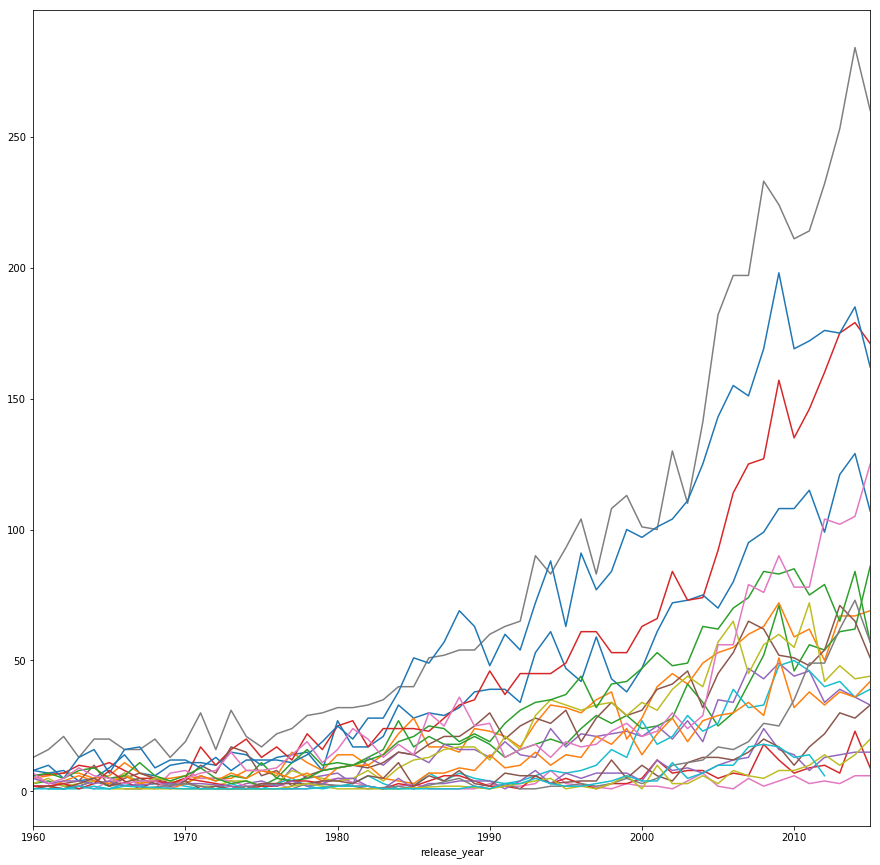

In [64]:
for item in genre_list:
    movie[movie['genre']==item].groupby('release_year').count()['id'].plot(kind='line',figsize=(15,15),label=item)

In [26]:
import matplotlib.pyplot as plt

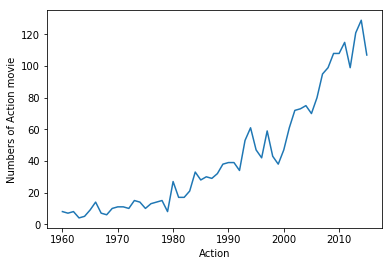

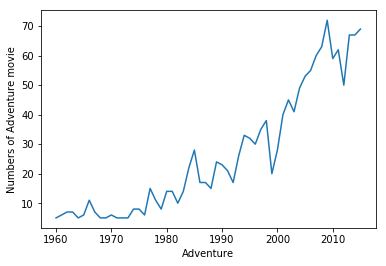

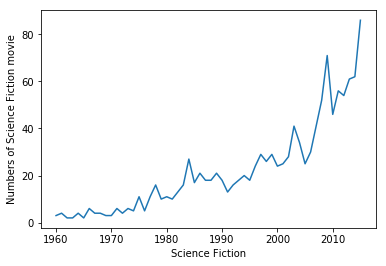

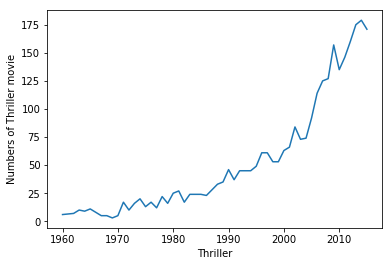

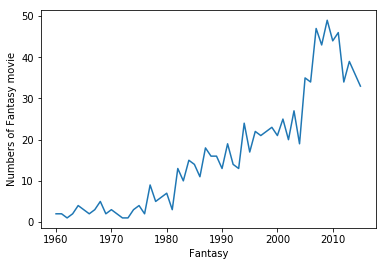

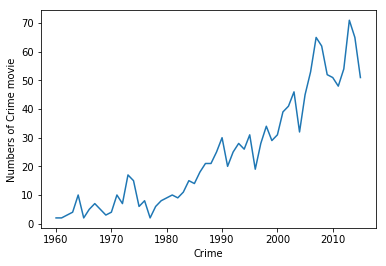

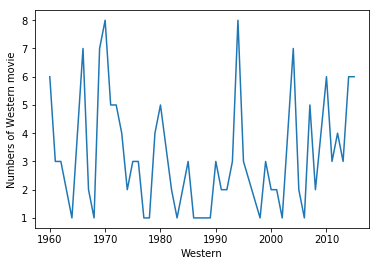

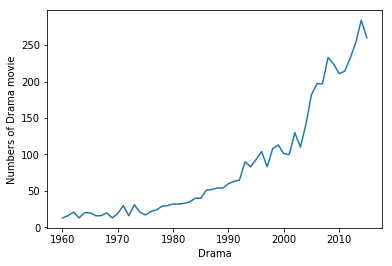

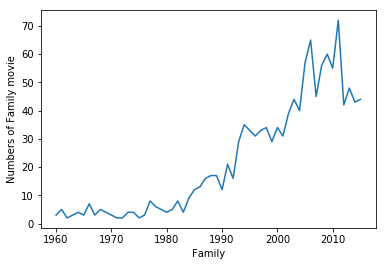

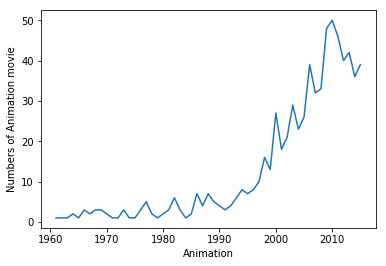

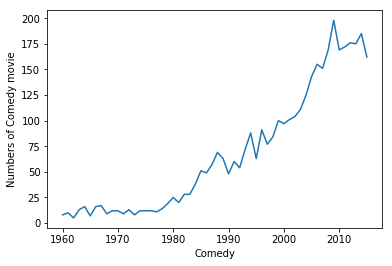

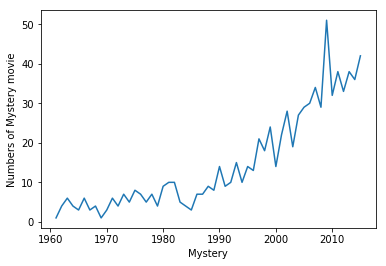

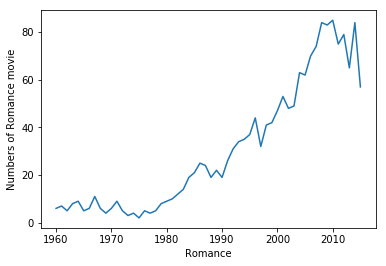

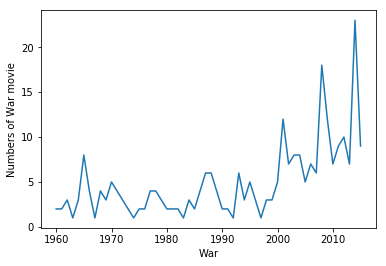

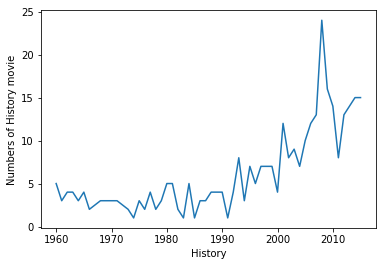

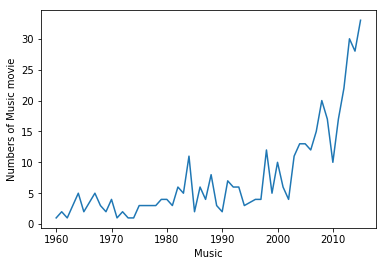

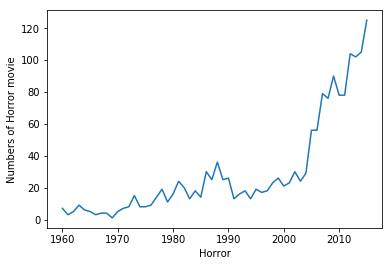

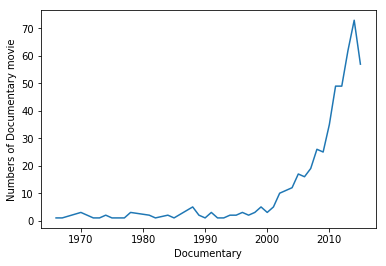

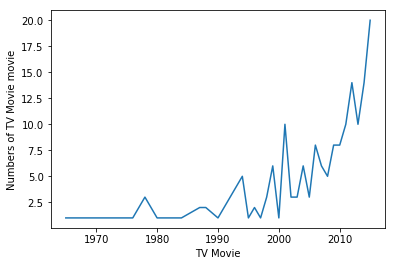

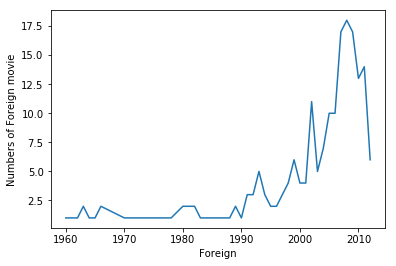

In [49]:
for item in genre_list:
    plt.figure()
    plt.plot(movie[movie['genre']==item].groupby('release_year').count()['id'])
    plt.xlabel(item)
    plt.ylabel('Numbers of {} movie'.format(item))

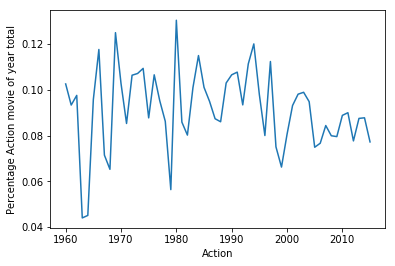

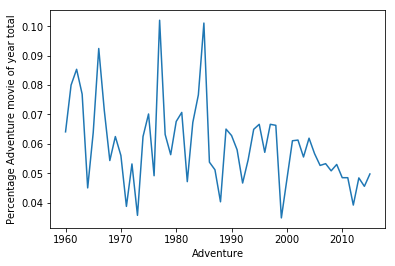

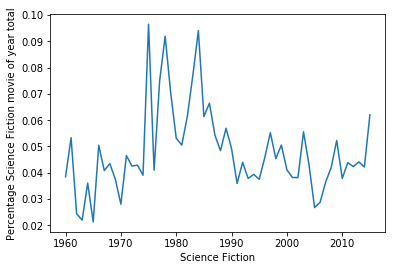

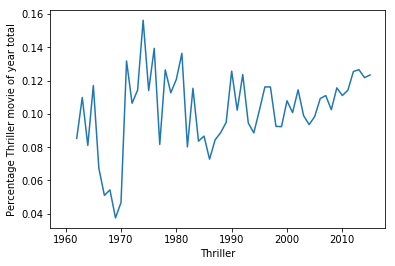

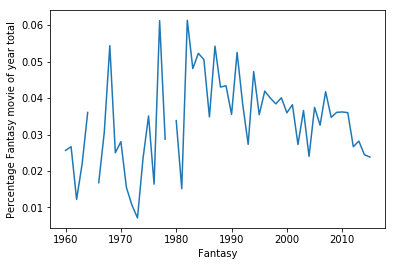

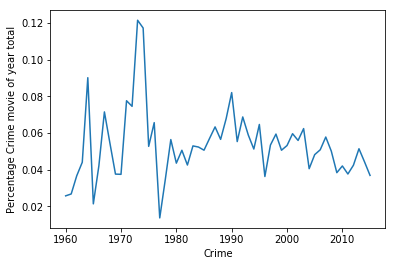

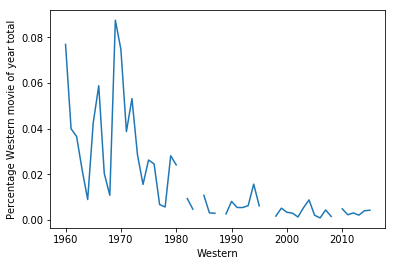

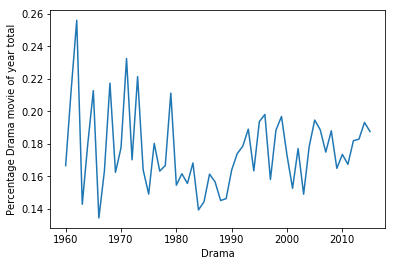

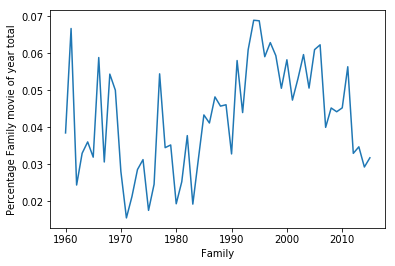

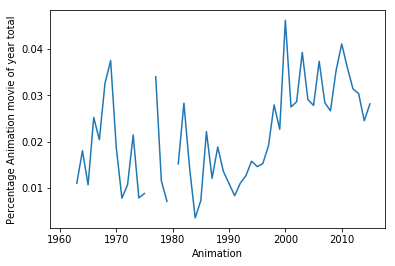

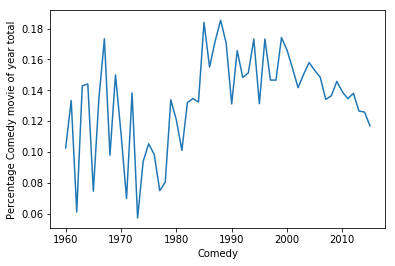

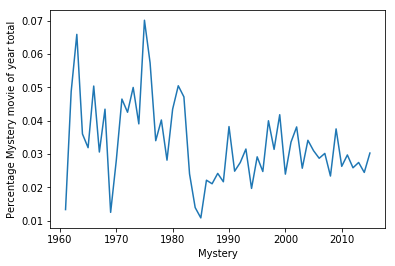

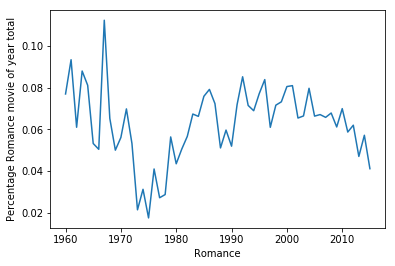

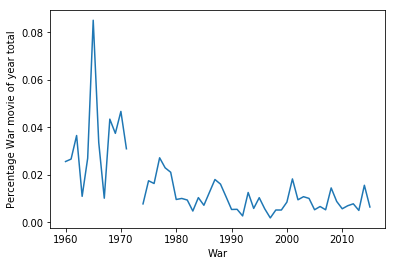

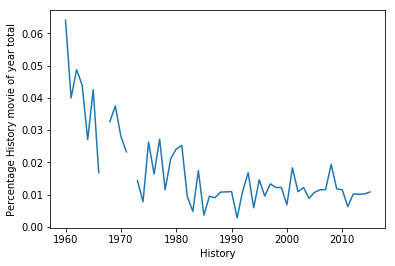

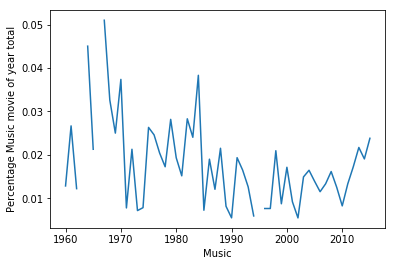

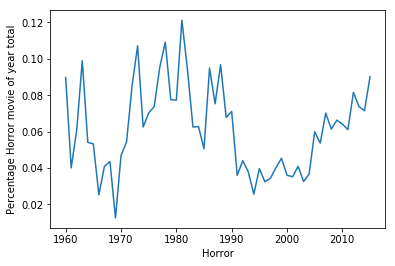

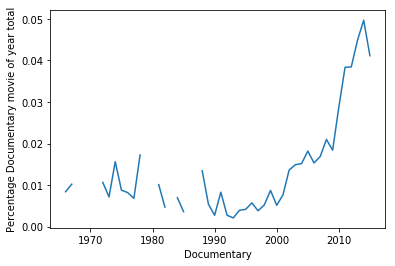

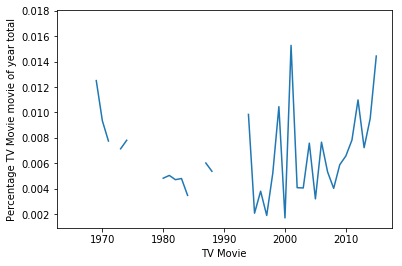

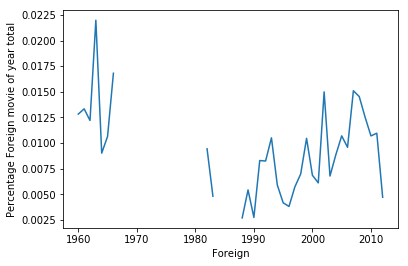

In [50]:
for item in genre_list:
    plt.figure()
    plt.plot(movie[movie['genre']==item].groupby('release_year').count()['id']/movie.groupby('release_year').count()['id'])
    plt.xlabel(item)
    plt.ylabel('Percentage {} movie of year total'.format(item))

## What kinds of properties are associated with movies that have high revenues?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dde9ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1135d9e10>]], dtype=object)

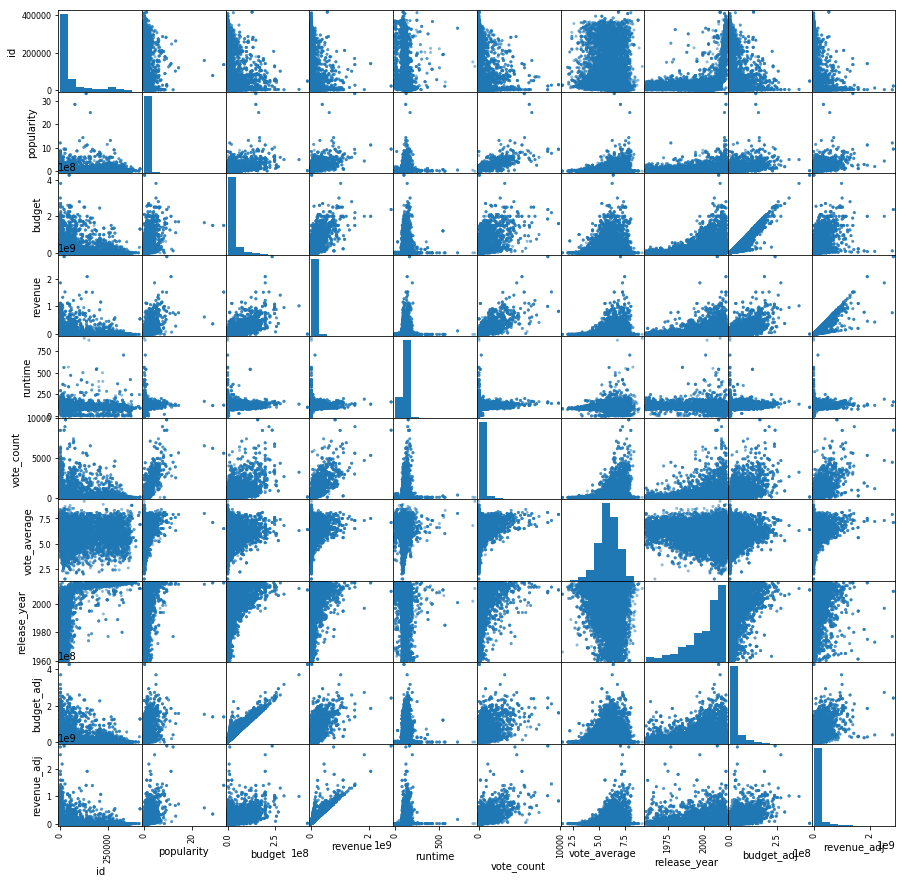

In [31]:
%matplotlib inline
pd.plotting.scatter_matrix(movie,figsize=(15,15))

In [41]:
columns=np.array(movie.columns).tolist()

In [48]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26960 entries, 0 to 10865
Data columns (total 21 columns):
id                      26960 non-null int64
imdb_id                 26937 non-null object
popularity              26960 non-null float64
budget                  26960 non-null int64
revenue                 26960 non-null int64
original_title          26960 non-null object
cast                    26836 non-null object
homepage                7150 non-null object
director                26869 non-null object
tagline                 20584 non-null object
keywords                23639 non-null object
overview                26955 non-null object
runtime                 26960 non-null int64
production_companies    24762 non-null object
release_date            26960 non-null datetime64[ns]
vote_count              26960 non-null int64
vote_average            26960 non-null float64
release_year            26960 non-null int64
budget_adj              26960 non-null float64
revenue_adj  

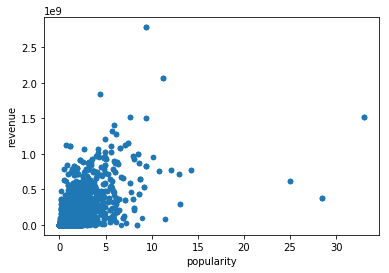

In [56]:
movie.plot(x='popularity',y='revenue',kind='scatter')

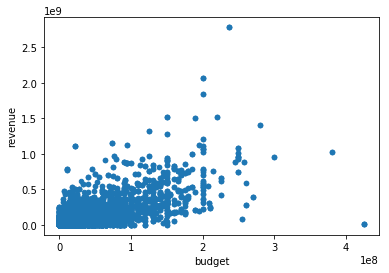

In [55]:
movie.plot(x='budget',y='revenue',kind='scatter')

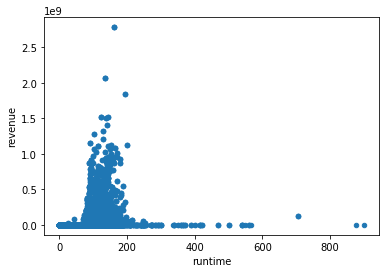

In [57]:
movie.plot(x='runtime',y='revenue',kind='scatter')

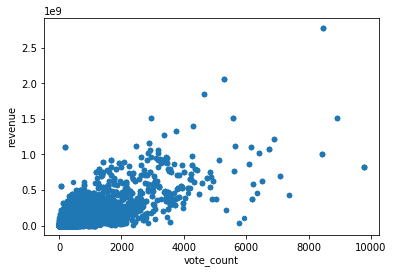

In [58]:
movie.plot(x='vote_count',y='revenue',kind='scatter')

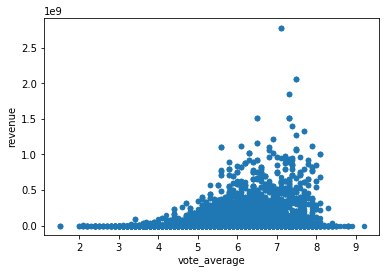

In [59]:
movie.plot(x='vote_average',y='revenue',kind='scatter')

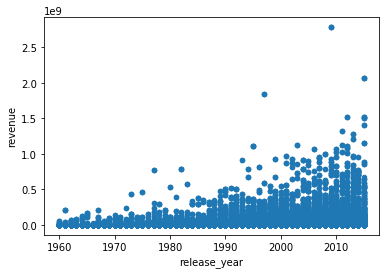

In [61]:
movie.plot(x='release_year',y='revenue',kind='scatter')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             

In [87]:
df.groupby('director').mean()['popularity'].sort_values(ascending=False).head(1)


director
Colin Trevorrow    16.696886
Name: popularity, dtype: float64

In [88]:
df.groupby('director').mean()['revenue'].sort_values(ascending=False).head(1)

director
Kyle Balda|Pierre Coffin    1.156731e+09
Name: revenue, dtype: float64

# director clean

In [92]:
df3 = df.director.str.split('|').apply(pd.Series).stack()
df3.index = df3.index.droplevel(-1)
directordf = pd.DataFrame(df3)
directordf.columns=['directors']
del df['director']
director=df.join(directordf)
director.dropna(subset=['directors'], inplace=True)


In [94]:
director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11892 entries, 0 to 10865
Data columns (total 21 columns):
id                      11892 non-null int64
imdb_id                 11884 non-null object
popularity              11892 non-null float64
budget                  11892 non-null int64
revenue                 11892 non-null int64
original_title          11892 non-null object
cast                    11801 non-null object
homepage                3279 non-null object
tagline                 8730 non-null object
keywords                10270 non-null object
overview                11889 non-null object
runtime                 11892 non-null int64
genres                  11856 non-null object
production_companies    10769 non-null object
release_date            11892 non-null object
vote_count              11892 non-null int64
vote_average            11892 non-null float64
release_year            11892 non-null int64
budget_adj              11892 non-null float64
revenue_adj           

In [95]:
director.groupby('directors').mean()['popularity'].sort_values(ascending=False).head(1)

directors
Colin Trevorrow    16.696886
Name: popularity, dtype: float64

In [96]:
director.groupby('directors').mean()['revenue'].sort_values(ascending=False).head(1)

directors
Pierre Coffin    8.903356e+08
Name: revenue, dtype: float64

# clean cast data


In [97]:
df4 = df.cast.str.split('|').apply(pd.Series).stack()
df4.index = df4.index.droplevel(-1)
castdf = pd.DataFrame(df4)
castdf.columns=['casts']
del df['cast']
cast=df.join(castdf)
cast.dropna(subset=['casts'], inplace=True)

In [98]:
cast.groupby('casts').mean()['popularity'].sort_values(ascending=False).head(1)

casts
Josh Helman    28.419936
Name: popularity, dtype: float64

In [99]:
cast.groupby('casts').mean()['revenue'].sort_values(ascending=False).head(1)

casts
Daisy Ridley    2.068178e+09
Name: revenue, dtype: float64